In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common import get_mnist

rand = np.random.RandomState(42)

def from_dummies(m=None):
    """get the integer value of a one-hot encoded vector"""
    res = pd.DataFrame(m, columns=range(10))
    return res.idxmax(axis=1)

def show_image(idx=0, dataset='train'):

    plt.imshow(xtrain[idx].reshape(28, 28))
    plt.show()

In [2]:
mnist = get_mnist()
xtrain = mnist['x']['train']
xtest = mnist['x']['test']
xval = mnist['x']['val']
ytrain = mnist['y']['train']
ytest = mnist['y']['test']
yval = mnist['y']['val']

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
xtrain.shape

(55000, 784)

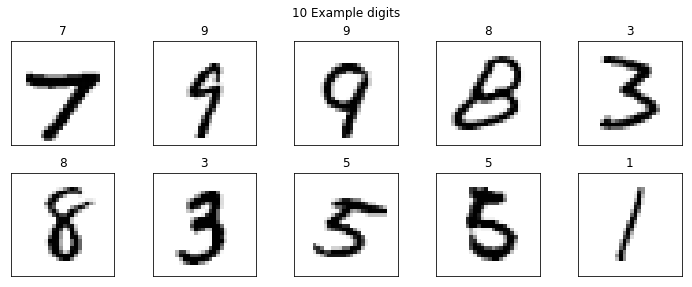

In [4]:
%matplotlib inline

idx = rand.randint(0,55000, size=10)

shape = (2, 5)
f, axarr = plt.subplots(shape[0], shape[1], figsize=2*np.array(shape[::-1]))
for i in range(10):
    r = i // shape[1]
    c = i % shape[1]
    plt.sca(axarr[r][c])
    chartdata = xtrain[idx[i]].reshape(28,28)
    ax = plt.imshow(chartdata, cmap='binary').axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(from_dummies(ytrain)[idx[i]])
f.suptitle('10 Example digits')
f.tight_layout(rect=[0,0,1,0.95])

In [5]:
for _ in [xtrain, ytrain, xtest, ytest, xval, yval]:
    display()
    display(_.shape)

(55000, 784)

(55000, 10)

(10000, 784)

(10000, 10)

(5000, 784)

(5000, 10)

In [6]:
import pandas as pd

tmp = pd.DataFrame(ytrain, columns=[0,1,2,3,4,5,6,7,8,9])

In [7]:
tmp.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


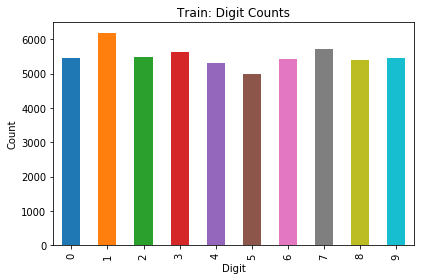

In [8]:
tmp.idxmax(axis=1).value_counts().sort_index().plot(kind='bar', title='{}: Digit Counts'.format('Train')).set(xlabel='Digit', ylabel='Count')
plt.tight_layout()

In [9]:
reshaped = xtrain.reshape(55000, 28, 28)

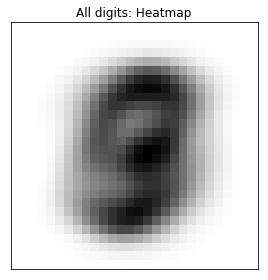

In [10]:
sum = reshaped.sum(axis=0)
ax = plt.imshow(sum, cmap='binary').axes
ax.figure.tight_layout(rect=[0,0,1,0.95])
ax.set(title='All digits: Heatmap')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.tight_layout()

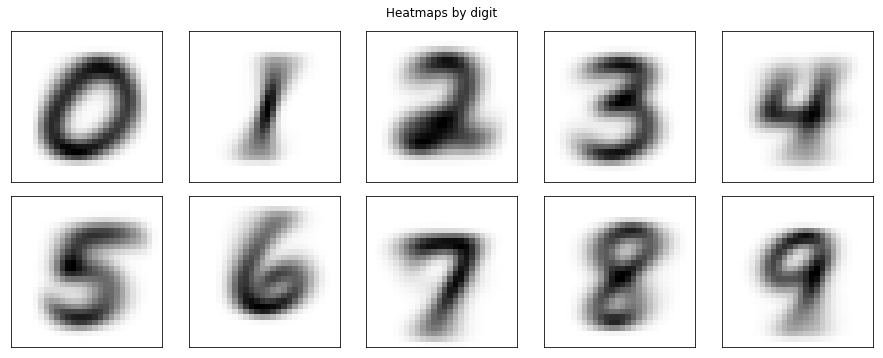

In [11]:
shape = (2, 5)
f, axarr = plt.subplots(shape[0], shape[1], figsize=2.5*np.array(shape[::-1]))
for i in range(10):
    r = i // shape[1]
    c = i % shape[1]
    plt.sca(axarr[r][c])
    idx = np.where(from_dummies(ytrain)==i)
    chartdata = reshaped[idx]
    chartdata = chartdata.sum(axis=0)
    plt.imshow(chartdata, cmap='binary')
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
f.suptitle('Heatmaps by digit')
f.tight_layout(rect=[0,0,1,0.95])

***The Absolute Baseline: Random Prediction***

In [12]:
preds = pd.get_dummies(pd.Series(rand.randint(low=0, high=10, size=yval.shape[0]))).values

preds = from_dummies(preds)
gt = from_dummies(yval)

(gt == preds).sum() / gt.shape[0]

0.1018

As expected, random prediction is correct 10% of the time.

In [13]:
ytrain.shape

(55000, 10)

***Logistic Regression:***

In [14]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()

lm.fit(xtrain, from_dummies(ytrain))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
xtest[0].shape

(784,)

In [16]:
lm.predict(xtest[0].reshape(1,-1))

array([7], dtype=int64)

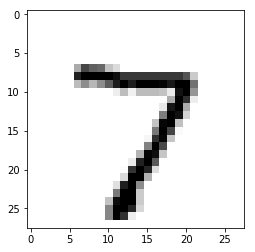

In [17]:
plt.imshow(xtest[0].reshape(28,28), cmap='binary')

In [18]:
preds = pd.DataFrame(lm.predict_proba(xval), columns=range(10)).idxmax(axis=1)
(preds == gt).sum() / gt.shape[0]

0.921

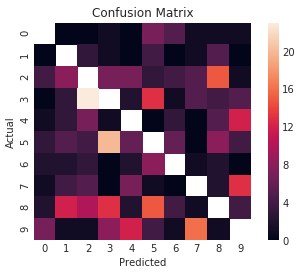

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

df = pd.DataFrame(confusion_matrix(gt, preds))
df = df[df < 300]
with sns.axes_style("white"):
    ax = sns.heatmap(df, square=True)
    ax.set(title='Confusion Matrix', xlabel='Predicted', ylabel='Actual')

In [20]:
res = dict()
for i in range(10):
    for j in range(10):
        res[(i,j)] = df.loc[i, j]

In [21]:
pd.Series(res).abs().sort_values(ascending=False).head()

3  2    23.0
5  3    20.0
9  7    16.0
2  8    15.0
8  5    15.0
dtype: float64

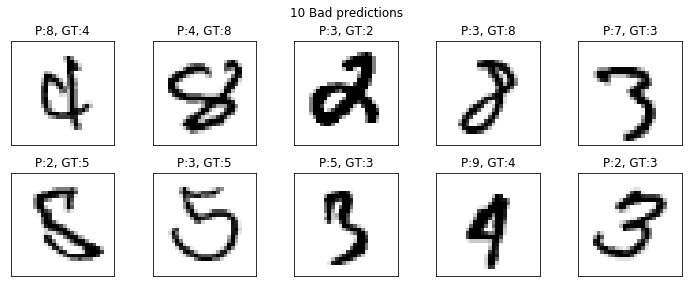

In [22]:
# Show some bad predictions

bad_predictions = preds.iloc[np.where(preds != gt)]


idx = rand.choice(bad_predictions.index, 10)

shape = (2, 5)
f, axarr = plt.subplots(shape[0], shape[1], figsize=2*np.array(shape[::-1]))
for i in range(10):
    r = i // shape[1]
    c = i % shape[1]
    plt.sca(axarr[r][c])
    chartdata = xval[idx[i]].reshape(28,28)
    ax = plt.imshow(chartdata, cmap='binary').axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title('P:{}, GT:{}'.format(preds[idx[i]], gt[idx[i]]))
f.suptitle('10 Bad predictions')
f.tight_layout(rect=[0,0,1,0.95])